# LinkedIn Analysis for the RLEs

There is always difference between the head count size registered by the companies and the actual number of people registered by the employee or the associated members on themselves to the companies on LinkedIn. If the difference is in the reliable difference range, the companies can be considered the reliable linkedin entities(RLE). This set of codes is for analysing further characteristics and linkedin usability for the RLEs.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Import dataset

In [4]:
linkedin = pd.read_csv("linkedin_companies.csv")
linkedin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   #                  100 non-null    int64  
 1   link               100 non-null    object 
 2   name               100 non-null    object 
 3   summary            95 non-null     object 
 4   size_registered    100 non-null    object 
 5   size_actual        100 non-null    int64  
 6   industry           100 non-null    object 
 7   hq_region          100 non-null    object 
 8   hq_location        100 non-null    object 
 9   followers          100 non-null    int64  
 10  head_count_growth  100 non-null    object 
 11  median_tenure      100 non-null    float64
 12  image              100 non-null    object 
 13  video              100 non-null    object 
 14  article            100 non-null    object 
 15  document           100 non-null    object 
 16  ad                 100 non-

In [5]:
linkedin.head(5)

,#,link,name,summary,size_registered,size_actual,industry,hq_region,hq_location,followers,head_count_growth,median_tenure,image,video,article,document,ad,newsletter
0,1,https://www.linkedin.com/company/leadershipright/,Leadership Right,Join Leadership Right—the daily newsletter tha...,201-500,341,Book and Periodical Publishing,NA/US,New York,1450003,30%,0.8,Y,Y,N,N,N,N
1,2,https://www.linkedin.com/company/stack-overflow/,Stack Overflow,Stack Overflow empowers the world to develop t...,501-1000,735,Software Development,NA/US,New York,1442665,6%,2.1,Y,Y,N,Y,Y,N
2,3,https://www.linkedin.com/company/inspiremugs/p...,InspireMugs.com,Linkedin's largest and most trusted motivation...,201-500,401,Retail,NA/US,New York,386078,12%,2.0,Y,Y,Y,N,N,N
3,4,https://www.linkedin.com/company/aditiconsulti...,Aditi Consulting,The Future Realized,501-1000,837,IT Services and IT Consulting,NA/US,Washington,388728,5%,2.1,Y,Y,Y,Y,Y,N
4,5,https://www.linkedin.com/company/mashable/,Mashable,NaN,201-500,373,Online Media,NA/US,New York,874332,2%,5.4,Y,Y,N,N,N,N


### Drop Useless Column

In [6]:
linkedin.drop("#",  axis='columns', inplace=True)

### Change Column Type to Aggregate

In [7]:
linkedin['head_count_growth'].replace('%', '', regex=True, inplace=True)
linkedin['head_count_growth'] = linkedin['head_count_growth'].astype('int64')

### Split Range Column into Start and End Values

In [8]:
linkedin[['size_range_start', 'size_range_end']] = linkedin['size_registered'].str.split('-', n=1, expand=True)

In [9]:
linkedin['size_range_start'] = linkedin['size_range_start'].astype('int64')
linkedin['size_range_end'] = linkedin['size_range_end'].astype('int64')

In [10]:
linkedin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   link               100 non-null    object 
 1   name               100 non-null    object 
 2   summary            95 non-null     object 
 3   size_registered    100 non-null    object 
 4   size_actual        100 non-null    int64  
 5   industry           100 non-null    object 
 6   hq_region          100 non-null    object 
 7   hq_location        100 non-null    object 
 8   followers          100 non-null    int64  
 9   head_count_growth  100 non-null    int64  
 10  median_tenure      100 non-null    float64
 11  image              100 non-null    object 
 12  video              100 non-null    object 
 13  article            100 non-null    object 
 14  document           100 non-null    object 
 15  ad                 100 non-null    object 
 16  newsletter         100 non-

In [11]:
linkedin.head(5)

,link,name,summary,size_registered,size_actual,industry,hq_region,hq_location,followers,head_count_growth,median_tenure,image,video,article,document,ad,newsletter,size_range_start,size_range_end
0,https://www.linkedin.com/company/leadershipright/,Leadership Right,Join Leadership Right—the daily newsletter tha...,201-500,341,Book and Periodical Publishing,NA/US,New York,1450003,30,0.8,Y,Y,N,N,N,N,201,500
1,https://www.linkedin.com/company/stack-overflow/,Stack Overflow,Stack Overflow empowers the world to develop t...,501-1000,735,Software Development,NA/US,New York,1442665,6,2.1,Y,Y,N,Y,Y,N,501,1000
2,https://www.linkedin.com/company/inspiremugs/p...,InspireMugs.com,Linkedin's largest and most trusted motivation...,201-500,401,Retail,NA/US,New York,386078,12,2.0,Y,Y,Y,N,N,N,201,500
3,https://www.linkedin.com/company/aditiconsulti...,Aditi Consulting,The Future Realized,501-1000,837,IT Services and IT Consulting,NA/US,Washington,388728,5,2.1,Y,Y,Y,Y,Y,N,501,1000
4,https://www.linkedin.com/company/mashable/,Mashable,NaN,201-500,373,Online Media,NA/US,New York,874332,2,5.4,Y,Y,N,N,N,N,201,500


## Size Difference EDA

In [12]:
linkedin_size = linkedin[['name','size_actual','size_range_start','size_range_end']]

In [13]:
linkedin['diff_from_start'] = linkedin['size_actual'] - linkedin['size_range_start']
linkedin['diff_from_end'] = linkedin['size_range_end'] - linkedin['size_actual']

### Size Cohort Categorisation

In [14]:
def cohort_setting(row):
    diff_from_start = row[19]
    diff_from_end = row[20]
    
    if diff_from_start < diff_from_end:
        return "Former"
    else:
        return "Latter" 
    
def flat_cols(df):
    df.columns = [' / '.join(x) for x in df.columns.to_flat_index()]
    return df

In [15]:
linkedin['size_cohort'] = linkedin.apply(cohort_setting, axis = "columns")
linkedin.head(5)

,link,name,summary,size_registered,size_actual,industry,hq_region,hq_location,followers,head_count_growth,...,video,article,document,ad,newsletter,size_range_start,size_range_end,diff_from_start,diff_from_end,size_cohort
0,https://www.linkedin.com/company/leadershipright/,Leadership Right,Join Leadership Right—the daily newsletter tha...,201-500,341,Book and Periodical Publishing,NA/US,New York,1450003,30,...,Y,N,N,N,N,201,500,140,159,Former
1,https://www.linkedin.com/company/stack-overflow/,Stack Overflow,Stack Overflow empowers the world to develop t...,501-1000,735,Software Development,NA/US,New York,1442665,6,...,Y,N,Y,Y,N,501,1000,234,265,Former
2,https://www.linkedin.com/company/inspiremugs/p...,InspireMugs.com,Linkedin's largest and most trusted motivation...,201-500,401,Retail,NA/US,New York,386078,12,...,Y,Y,N,N,N,201,500,200,99,Latter
3,https://www.linkedin.com/company/aditiconsulti...,Aditi Consulting,The Future Realized,501-1000,837,IT Services and IT Consulting,NA/US,Washington,388728,5,...,Y,Y,Y,Y,N,501,1000,336,163,Latter
4,https://www.linkedin.com/company/mashable/,Mashable,NaN,201-500,373,Online Media,NA/US,New York,874332,2,...,Y,N,N,N,N,201,500,172,127,Latter


In [16]:
df = pd.pivot_table(linkedin,index = 'size_cohort',columns = 'size_registered',values = 'name',aggfunc = 'count')
df

size_registered,201-500,501-1000
size_cohort,,
Former,18,34
Latter,18,30


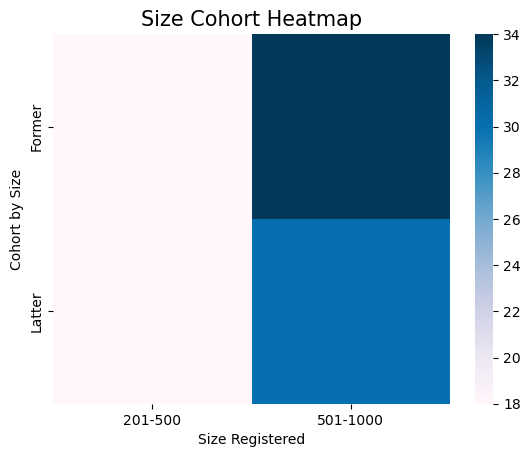

In [17]:
ax = sns.heatmap(df, cmap = 'PuBu')

plt.title('Size Cohort Heatmap', fontsize=15)
plt.xlabel("Size Registered")
plt.ylabel("Cohort by Size")

plt.show() 

### Size Difference Breakdown per Region

In [18]:
size_region_pivot = linkedin.groupby(['size_registered','hq_region']).agg({'name':'count',
                                             'size_actual':['mean', 'max','min'],
                                             'diff_from_end':['mean', 'max','min']}).pipe(flat_cols).round(2)
size_region_pivot.sort_values(['size_registered','diff_from_end / mean'], ascending=False)

name / count  size_actual / mean  \
size_registered hq_region                                     
501-1000        APAC                 24              595.62   
                EMEA                 18              629.17   
                NA/US                22              777.82   
201-500         APAC                 10              314.50   
                EMEA                 15              333.00   
                NA/US                11              341.09   

                           size_actual / max  size_actual / min  \
size_registered hq_region                                         
501-1000        APAC                     959                141   
                EMEA                     974                170   
                NA/US                    995                245   
201-500         APAC                     446                236   
                EMEA                     471                128   
                NA/US                    487                 53   

                           diff_from_end / mean  diff_from_end / max  \
size_registered hq_region                                              
501-1000        APAC                     404.38                  859   
                EMEA                     370.83                  830   
                NA/US                    222.18                  755   
201-500         APAC                     185.50                  264   
                EMEA                     167.00                  372   
                NA/US                    158.91                  447   

                           diff_from_end / min  
size_registered hq_region                       
501-1000        APAC                        41  
                EMEA                        26  
                NA/US                        5  
201-500         APAC                        54  
                EMEA                        29  
                NA/US                       13

### Size Difference Breakdown per Industry

In [19]:
size_industry_pivot = linkedin.groupby(['size_registered','industry']).agg({'name':'count',
                                             'size_actual':['mean', 'max','min'],
                                             'diff_from_end':['mean', 'max','min']}).pipe(flat_cols).round(2)
size_industry_pivot[size_industry_pivot['name / count'] > 1].sort_values(['size_registered','diff_from_end / mean'], ascending=False)

name / count  \
size_registered industry                                                    
501-1000        Retail Apparel and Fashion                              2   
                Newspaper Publishing                                    3   
                Broadcast Media Production and Distribution             3   
                Government Administration                               4   
                IT Services and IT Consulting                          12   
                Food and Beverage Services                              2   
                Financial Services                                      3   
                Design Services                                         2   
                Advertising Services                                    2   
                Real Estate                                             2   
                Technology, Information and Internet                    3   
                Software Development                                    3   
                Retail                                                  2   
                Hospitals and Health Care                               2   
201-500         Newspaper Publishing                                    3   
                Oil and Gas                                             2   
                Software Development                                    2   
                Advertising Services                                    5   
                Technology, Information and Internet                    2   
                IT Services and IT Consulting                           2   
                E-Learning Providers                                    2   

                                                             size_actual / mean  \
size_registered industry                                                          
501-1000        Retail Apparel and Fashion                               368.00   
                Newspaper Publishing                                     436.67   
                Broadcast Media Production and Distribution              506.33   
                Government Administration                                561.25   
                IT Services and IT Consulting                            571.92   
                Food and Beverage Services                               634.00   
                Financial Services                                       726.33   
                Design Services                                          732.50   
                Advertising Services                                     764.00   
                Real Estate                                              790.50   
                Technology, Information and Internet                     794.67   
                Software Development                                     807.67   
                Retail                                                   836.00   
                Hospitals and Health Care                                924.00   
201-500         Newspaper Publishing                                     269.00   
                Oil and Gas                                              297.00   
                Software Development                                     305.50   
                Advertising Services                                     341.00   
                Technology, Information and Internet                     346.00   
                IT Services and IT Consulting                            381.50   
                E-Learning Providers                                     383.00   

                                                             size_actual / max  \
size_registered industry                                                         
501-1000        Retail Apparel and Fashion                                 595   
                Newspaper Publishing                                       768   
                Broadcast Media Production and Dist

### Minimum Percentage of Employees on LinkedIn per Region / Industry

In [42]:
linkedin['percentage'] = (linkedin['size_actual'] / linkedin['size_range_end']) * 100

In [61]:
percentage_region_pivot = linkedin.groupby(['hq_region']).agg({'percentage':['mean']}).pipe(flat_cols).round(2)
percentage_region_pivot = percentage_region_pivot.reset_index()
percentage_region_pivot

,hq_region,percentage / mean
0,APAC,60.54
1,EMEA,64.59
2,NA/US,74.59


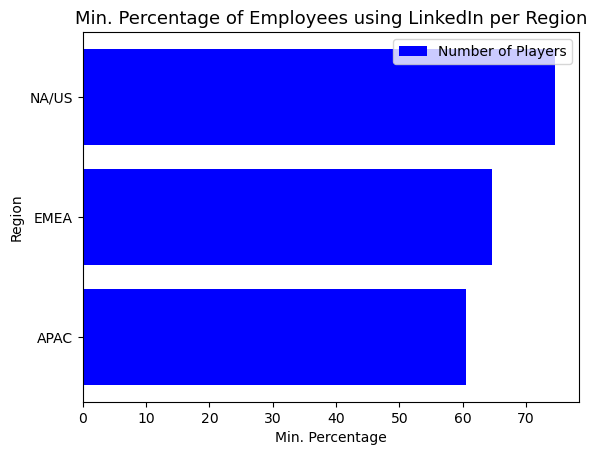

In [70]:
plt.figure()

plt.barh(percentage_region_pivot['hq_region'],percentage_region_pivot['percentage / mean'], color = "blue", label = 'Number of Players')
  
plt.xlabel("Min. Percentage", fontsize = 10)
plt.ylabel("Region", fontsize = 10)
plt.title("Min. Percentage of Employees using LinkedIn per Region", fontsize = 13)

plt.legend(fontsize = 10, loc=1)
plt.show()

In [77]:
percentage_industry_pivot = linkedin.groupby(['industry']).agg({'percentage':['mean']}).pipe(flat_cols).round(2)
percentage_industry_pivot = percentage_industry_pivot.reset_index()
percentage_industry_pivot = percentage_industry_pivot.sort_values('percentage / mean', ascending=False).head(5)
percentage_industry_pivot

,industry,percentage / mean
8,Computers and Electronics Manufacturing,95.90
19,Hospitals and Health Care,94.07
13,Education Administration Programs,91.70
24,International Trade and Development,91.00
1,Airlines and Aviation,89.40


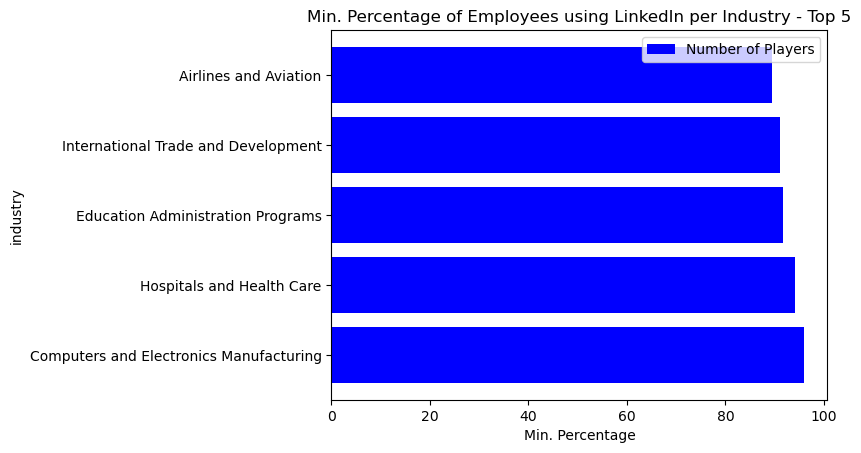

In [79]:
plt.figure()

plt.barh(percentage_industry_pivot['industry'],percentage_industry_pivot['percentage / mean'], color = "blue", label = 'Number of Players')
  
plt.xlabel("Min. Percentage", fontsize = 10)
plt.ylabel("industry", fontsize = 10)
plt.title("Min. Percentage of Employees using LinkedIn per Industry - Top 5", fontsize = 12)

plt.legend(fontsize = 10, loc=1)
plt.show()

## Company Attributes EDA

In [20]:
linkedin_companies = linkedin[['name', 'summary', 'size_registered', 'size_actual','industry','hq_region','hq_location','followers','head_count_growth','median_tenure']]
linkedin_companies.head(5)

,name,summary,size_registered,size_actual,industry,hq_region,hq_location,followers,head_count_growth,median_tenure
0,Leadership Right,Join Leadership Right—the daily newsletter tha...,201-500,341,Book and Periodical Publishing,NA/US,New York,1450003,30,0.8
1,Stack Overflow,Stack Overflow empowers the world to develop t...,501-1000,735,Software Development,NA/US,New York,1442665,6,2.1
2,InspireMugs.com,Linkedin's largest and most trusted motivation...,201-500,401,Retail,NA/US,New York,386078,12,2.0
3,Aditi Consulting,The Future Realized,501-1000,837,IT Services and IT Consulting,NA/US,Washington,388728,5,2.1
4,Mashable,NaN,201-500,373,Online Media,NA/US,New York,874332,2,5.4


### Attributes Breakdown per Region

In [80]:
region_pivot = linkedin_companies.groupby('hq_region').agg({'name':'count',
                                             'followers':['mean'],
                                             'head_count_growth':['mean'],
                                             'median_tenure':['mean']}).pipe(flat_cols).round(2)
region_pivot.sort_values('followers / mean', ascending = False)

,name / count,followers / mean,head_count_growth / mean,median_tenure / mean
hq_region,,,,
NA/US,33,299795.00,7.45,2.65
EMEA,33,194081.30,6.88,3.02
APAC,34,168507.56,5.85,2.11


### Attributes Breakdown per Industry

In [81]:
industry_pivot = linkedin_companies.groupby('industry').agg({'name':'count',
                                             'followers':['mean'],
                                             'head_count_growth':['mean'],
                                             'median_tenure':['mean']}).pipe(flat_cols).round(2)
industry_pivot = industry_pivot[(industry_pivot['name / count'] > 1)].sort_values('followers / mean', ascending = False)
industry_pivot.head()

,name / count,followers / mean,head_count_growth / mean,median_tenure / mean
industry,,,,
Book and Periodical Publishing,2,796820.50,17.50,2.30
Broadcast Media Production and Distribution,3,441333.67,5.67,5.07
Software Development,5,383172.60,3.00,2.18
Government Administration,4,272719.75,8.00,2.60
Newspaper Publishing,6,252550.00,5.67,3.57


## Frequently Used Words in Summary

In [23]:
text = " ".join(review for review in linkedin_companies.summary.fillna('NONE'))
print ("There are {} words in the combination of all review.".format(len(text)))

There are 6544 words in the combination of all review.


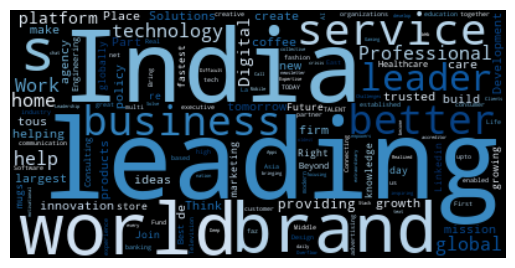

In [24]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["and", "on", "in", "the", "that", "for", "NONE"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, colormap="Blues_r").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Usability EDA

In [25]:
linkedin_usability = linkedin[['name', 'hq_region', 'industry','image', 'video','article','document','ad','newsletter']]
linkedin_usability.head(5)

,name,hq_region,industry,image,video,article,document,ad,newsletter
0,Leadership Right,NA/US,Book and Periodical Publishing,Y,Y,N,N,N,N
1,Stack Overflow,NA/US,Software Development,Y,Y,N,Y,Y,N
2,InspireMugs.com,NA/US,Retail,Y,Y,Y,N,N,N
3,Aditi Consulting,NA/US,IT Services and IT Consulting,Y,Y,Y,Y,Y,N
4,Mashable,NA/US,Online Media,Y,Y,N,N,N,N


In [26]:
def image_score(row):
    
    image_bool = row[3]
    
    if image_bool == "Y":
        return 1
    else:
        return 0

def video_score(row):
    
    video_bool = row[4]
    
    if video_bool == "Y":
        return 1
    else:
        return 0   

def article_score(row):
    
    article_bool = row[5]
    
    if article_bool == "Y":
        return 1
    else:
        return 0

def document_score(row):
    
    document_bool = row[6]
    
    if document_bool == "Y":
        return 1
    else:
        return 0 

def ad_score(row):
    ad_bool = row[7]
    
    if ad_bool == "Y":
        return 1
    else:
        return 0 

def newsletter_score(row):
    
    newsletter_bool = row[8]
    
    if newsletter_bool == "Y":
        return 1
    else:
        return 0  

In [27]:
linkedin_usability["usability_score"] = linkedin_usability.apply(image_score, axis = "columns") + linkedin_usability.apply(video_score, axis = "columns")+ linkedin_usability.apply(article_score, axis = "columns")+ linkedin_usability.apply(document_score, axis = "columns")+ linkedin_usability.apply(ad_score, axis = "columns")+ linkedin_usability.apply(newsletter_score, axis = "columns")

In [28]:
linkedin_usability

,name,hq_region,industry,image,video,article,document,ad,newsletter,usability_score
0,Leadership Right,NA/US,Book and Periodical Publishing,Y,Y,N,N,N,N,2
1,Stack Overflow,NA/US,Software Development,Y,Y,N,Y,Y,N,4
2,InspireMugs.com,NA/US,Retail,Y,Y,Y,N,N,N,3
3,Aditi Consulting,NA/US,IT Services and IT Consulting,Y,Y,Y,Y,Y,N,5
4,Mashable,NA/US,Online Media,Y,Y,N,N,N,N,2
...,...,...,...,...,...,...,...,...,...,...
95,Urban Ladder,APAC,"Technology, Information and Internet",Y,Y,N,N,N,N,2
96,Karrot,APAC,"Technology, Information and Internet",Y,Y,N,N,Y,N,3
97,Mirae Asset Global Investments,APAC,Investment Management,Y,Y,N,Y,Y,N,4
98,Flash Coffee,APAC,"Technology, Information and Internet",Y,Y,Y,Y,N,N,4


### Usability Breakdown per Region

In [29]:
usability_region_pivot = linkedin_usability.groupby('hq_region').agg({'name':'count',
                                                                             'usability_score':{'mean', 'max'}}).pipe(flat_cols).round(2).sort_values('usability_score / mean', ascending = False)
usability_region_pivot = usability_region_pivot[(usability_region_pivot['name / count'] > 1)].sort_values('usability_score / mean', ascending=False)

In [30]:
usability_region_pivot

,name / count,usability_score / mean,usability_score / max
hq_region,,,
NA/US,33,3.97,6
EMEA,33,3.91,6
APAC,34,3.82,5


### Usability Breakdown per Industry

In [31]:
usability_industry_pivot = linkedin_usability.groupby('industry').agg({'name':'count',
                                                                             'usability_score':{'mean', 'max'}}).pipe(flat_cols).round(2)
usability_industry_pivot = usability_industry_pivot[(usability_industry_pivot['name / count'] > 1)].sort_values('usability_score / mean', ascending=False)

In [82]:
usability_industry_pivot.head(5)

,name / count,usability_score / mean,usability_score / max
industry,,,
Real Estate,2,5.00,5
Newspaper Publishing,6,4.83,6
Software Development,5,4.80,6
Information Services,2,4.50,5
E-Learning Providers,2,4.50,5


## Usability - Followers Correlation

In [33]:
linkedin["usability_score"] = linkedin_usability["usability_score"]
use_foll = linkedin[['name','followers','usability_score']].groupby("usability_score").agg({'name':'count','followers':{'mean','max'}}).pipe(flat_cols).round(2)
use_foll

,name / count,followers / mean,followers / max
usability_score,,,
0,1,151017.00,151017
1,3,144500.00,170569
2,9,499922.33,1450003
3,22,167872.05,386078
4,30,231559.00,1442665
5,27,169457.15,419813
6,8,216007.38,362872


In [34]:
use_foll['avg_follower_rank'] = use_foll['followers / mean'].rank(method = 'dense', ascending = False)
temp1 = use_foll[['avg_follower_rank']]
temp1

,avg_follower_rank
usability_score,
0,6.0
1,7.0
2,1.0
3,5.0
4,2.0
5,4.0
6,3.0


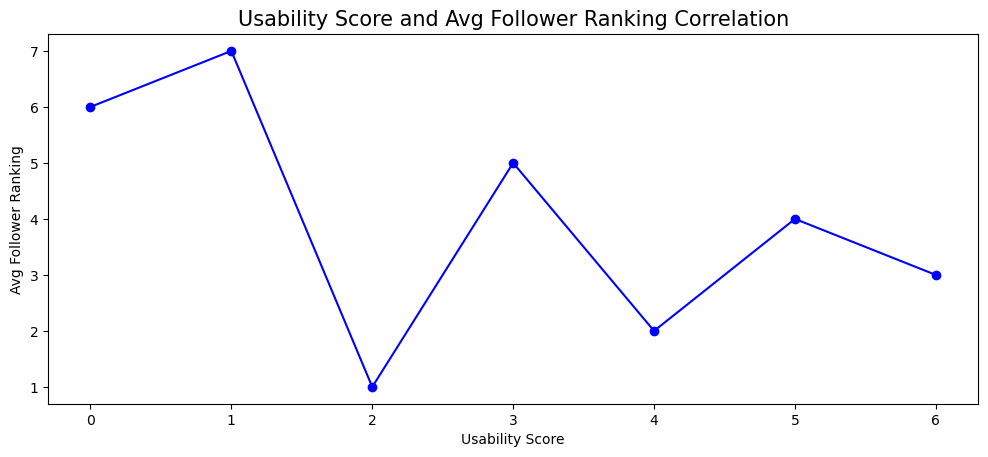

In [35]:
plt.figure().set_figwidth(12)
plt.plot(temp1, color = "blue", marker = 'o')

# Labelling 

plt.xlabel("Usability Score")
plt.ylabel("Avg Follower Ranking")
plt.title("Usability Score and Avg Follower Ranking Correlation", fontsize = 15)

# Display
plt.show()

## Headcount - Usability Correlation

In [36]:
head_use = linkedin[['name','size_actual','usability_score']].groupby("usability_score").agg({'name':'count','size_actual':{'mean','max'}}).pipe(flat_cols).round(2)
head_use

,name / count,size_actual / mean,size_actual / max
usability_score,,,
0,1,141.00,141
1,3,414.33,533
2,9,519.11,917
3,22,548.32,941
4,30,562.77,991
5,27,615.48,995
6,8,375.50,841


In [37]:
head_use['avg_hcount_rank'] = head_use['size_actual / mean'].rank(method = 'dense', ascending = False)
temp2 = head_use[['avg_hcount_rank']]
temp2

,avg_hcount_rank
usability_score,
0,7.0
1,5.0
2,4.0
3,3.0
4,2.0
5,1.0
6,6.0


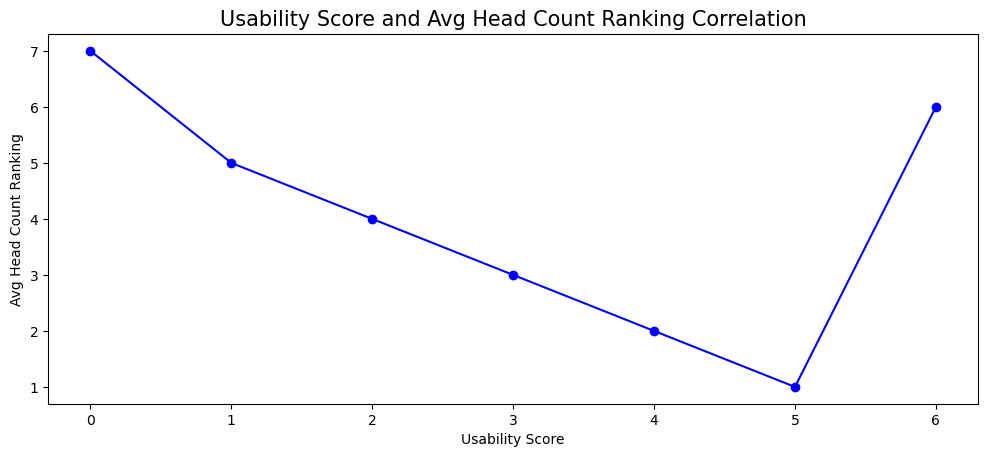

In [38]:
plt.figure().set_figwidth(12)
plt.plot(temp2, color = "blue", marker = 'o')

# Labelling 

plt.xlabel("Usability Score")
plt.ylabel("Avg Head Count Ranking")
plt.title("Usability Score and Avg Head Count Ranking Correlation", fontsize = 15)

# Display
plt.show()

## Headcount - Followers Correlation

In [39]:
head_foll = linkedin[['name','size_actual','followers']]
head_foll.head()

,name,size_actual,followers
0,Leadership Right,341,1450003
1,Stack Overflow,735,1442665
2,InspireMugs.com,401,386078
3,Aditi Consulting,837,388728
4,Mashable,373,874332


In [40]:
head_foll['hcount_rank'] = head_foll['size_actual'].rank(method = 'dense', ascending = False)
head_foll['follower_rank'] = head_foll['followers'].rank(method = 'dense', ascending = False)
temp3 = head_foll[['hcount_rank','follower_rank']]
temp3

,hcount_rank,follower_rank
0,73.0,1.0
1,31.0,2.0
2,59.0,8.0
3,21.0,6.0
4,65.0,3.0
...,...,...
95,6.0,87.0
96,72.0,100.0
97,12.0,96.0
98,42.0,99.0


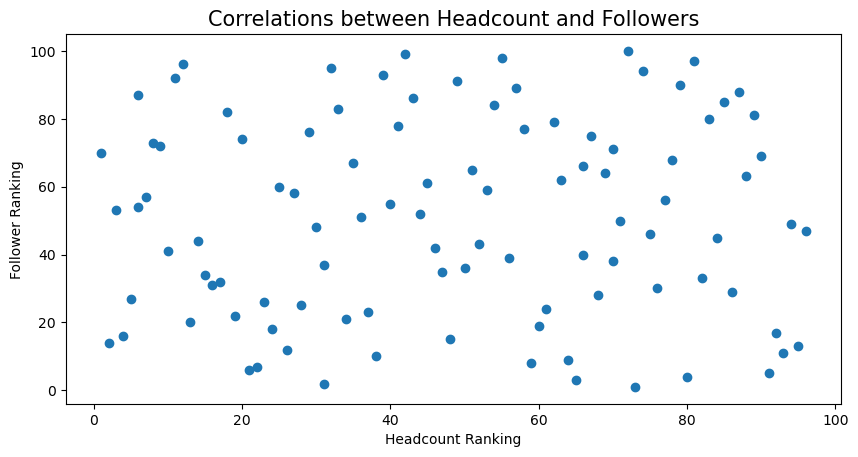

In [41]:
plt.figure().set_figwidth(10)

plt.scatter(temp3['hcount_rank'],temp3['follower_rank'])

plt.xlabel("Headcount Ranking")
plt.ylabel("Follower Ranking")
plt.title("Correlations between Headcount and Followers", fontsize = 15)

plt.show()